## Date Extraction, Cleaning and Transformation

- handle missing value
- transform units
- normalization / scalling 

### import necessary packages

In [1]:
import missingno as msno
import pandas as pd
import logging
import sys
import os

sys.path.append(os.path.abspath(os.path.join("../script")))
from data_clean_handler import format_float, find_agg,convert_bytes_to_megabytes,fix_missing_ffill,fix_missing_bfill
from get_dataframe_information import get_skewness_missing_count, get_skewness
from get_missing_information import missing_values_table, percent_missing


/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Logging configuration

In [12]:
logging.basicConfig(filename='../logfile.log',filemode='a',
                    encoding='utf-8', level=logging.DEBUG)


## Extract data from excell file into pandas dataframe

In [10]:
from logging import exception
try:
    df_from_excell = pd.read_excel('../data/Week1_challenge_data_source.xlsx')
except BaseException:
    logging.warning('file not found or wrong file format')

In [11]:
print(df_from_excell.columns.tolist())

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [13]:
print(f" There are {df_from_excell.shape[0]} rows and {df_from_excell.shape[1]} columns")

 There are 150001 rows and 55 columns


In [14]:
df_from_excell.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

the data contains 55 columns with dattime, float and string data type. 2 datetime clolumn, 1 string column, and the rest are float.

In [15]:
# identify thos which do not have missing values
i = 0
for key, item in df_from_excell.isnull().sum().items():
    if item==0:
        i+=1
        print(key)
print('the dataset contain {} columns with no missing values'.format(i))

Bearer Id
Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (Bytes)
Youtube UL (Bytes)
Netflix DL (Bytes)
Netflix UL (Bytes)
Gaming DL (Bytes)
Gaming UL (Bytes)
Other DL (Bytes)
Other UL (Bytes)
the dataset contain 15 columns with no missing values


In [16]:
#get those who has missing values
columns = []
counts=[]
i=0
for key, item in df_from_excell.isnull().sum().items():
    if item != 0:
        columns.append(key)
        counts.append(item)
        i+=1
print('the dataset contain {} columns with missing values'.format(i))
pd.DataFrame({'column name':columns,'counts':counts})


the dataset contain 40 columns with missing values


,column name,counts
0,Start,1
1,Start ms,1
2,End,1
3,End ms,1
4,Dur. (ms),1
5,IMSI,570
6,MSISDN/Number,1066
7,IMEI,572
8,Last Location Name,1153
9,Avg RTT DL (ms),27829


<AxesSubplot:>

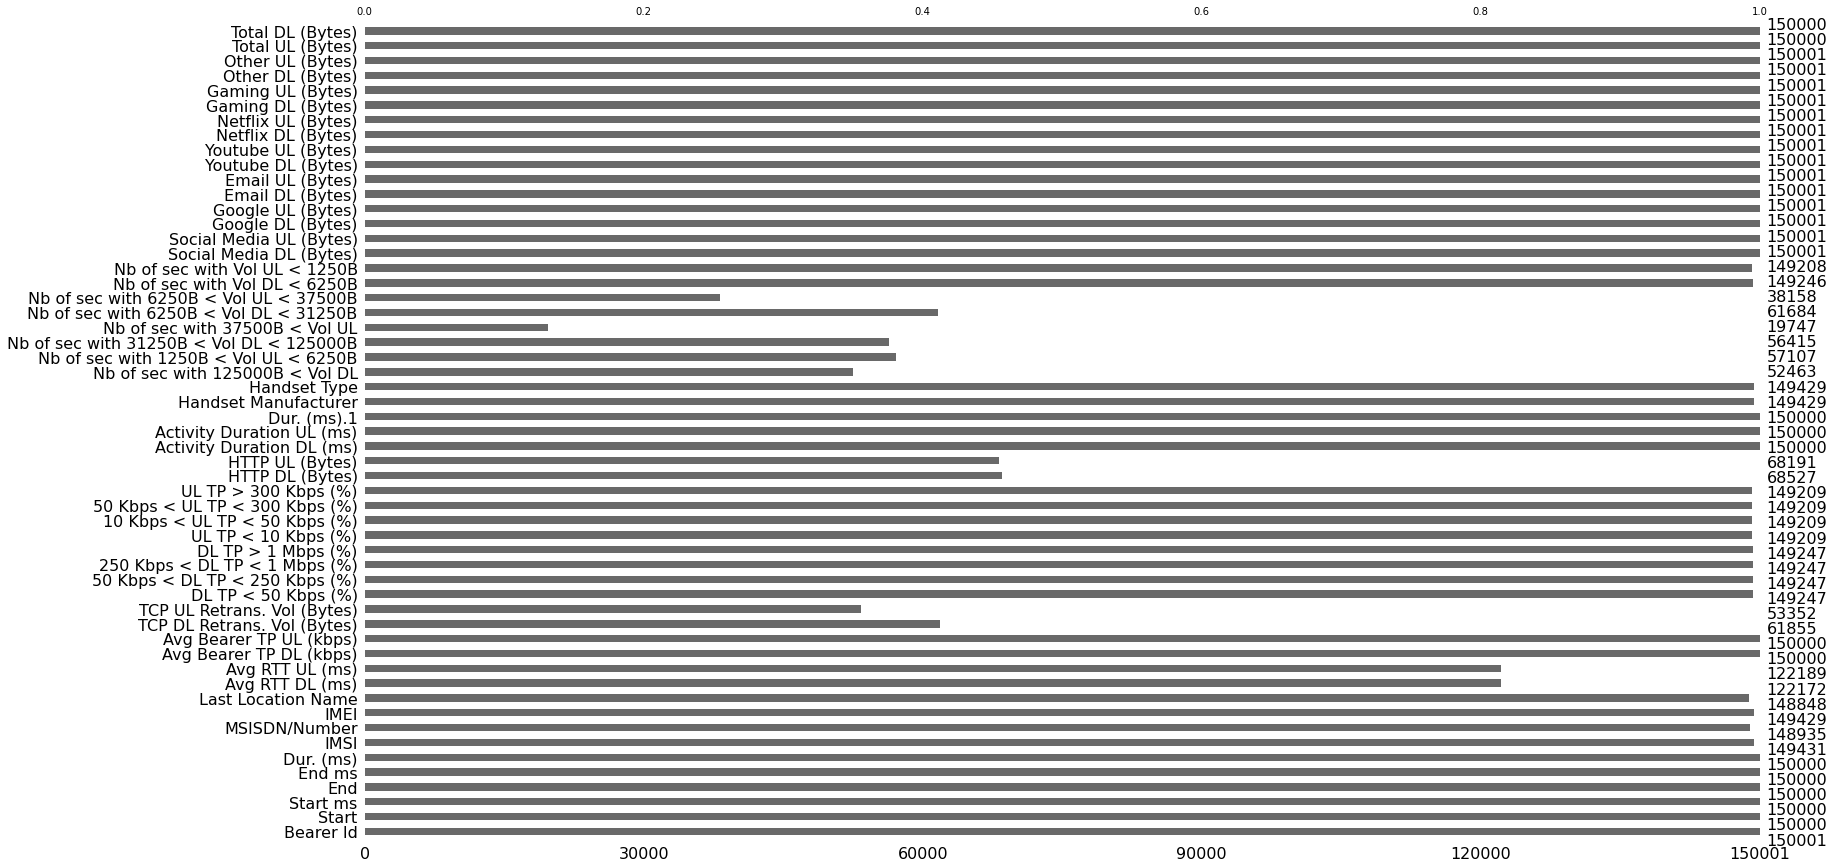

In [17]:
# fig = missing_values.plot(kind='bar', fontsize=12,
#                           figsize=(10, 6), rot=45).get_figure()
# fig.savefig("missing_values_bar_chart.png")
msno.bar(df_from_excell)


<AxesSubplot:>

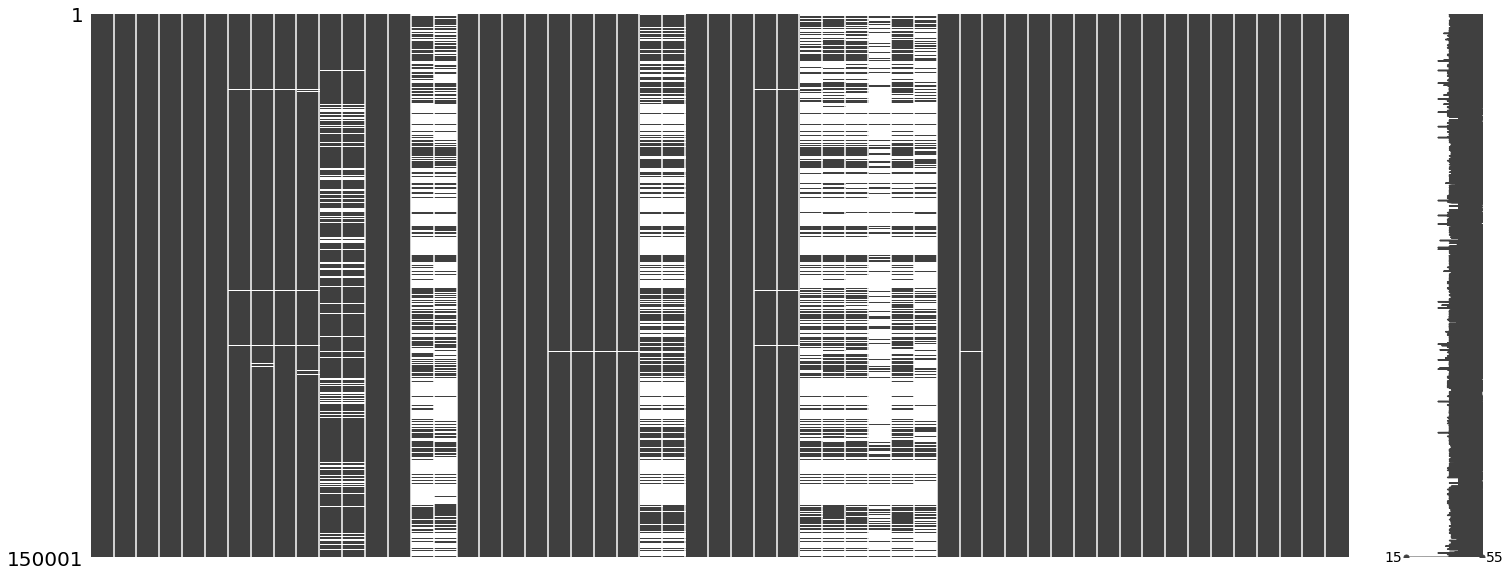

In [18]:
msno.matrix(df_from_excell)


<AxesSubplot:>

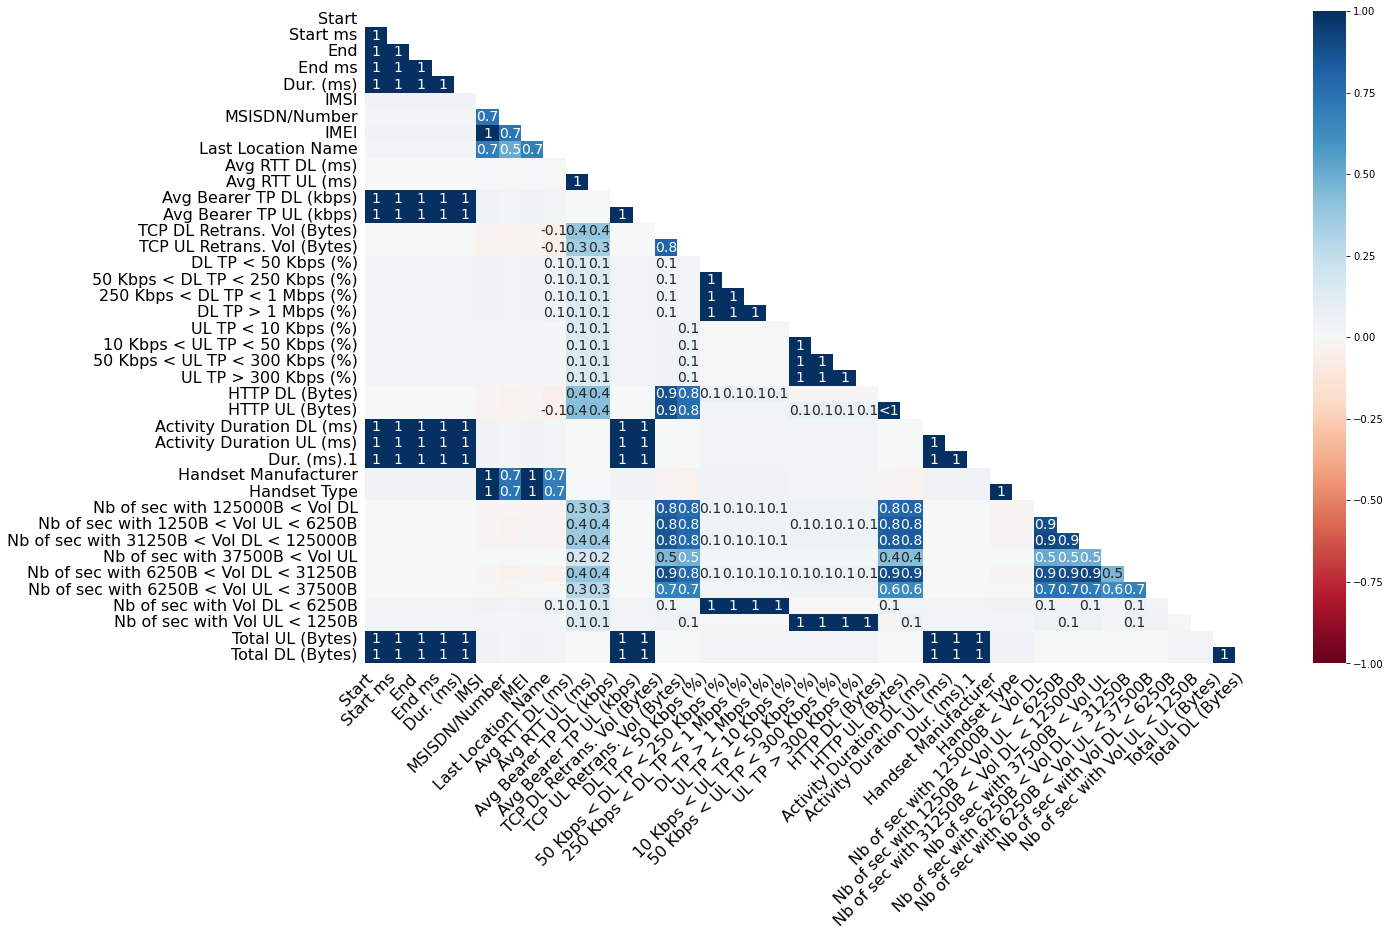

In [19]:
msno.heatmap(df_from_excell)


<AxesSubplot:>

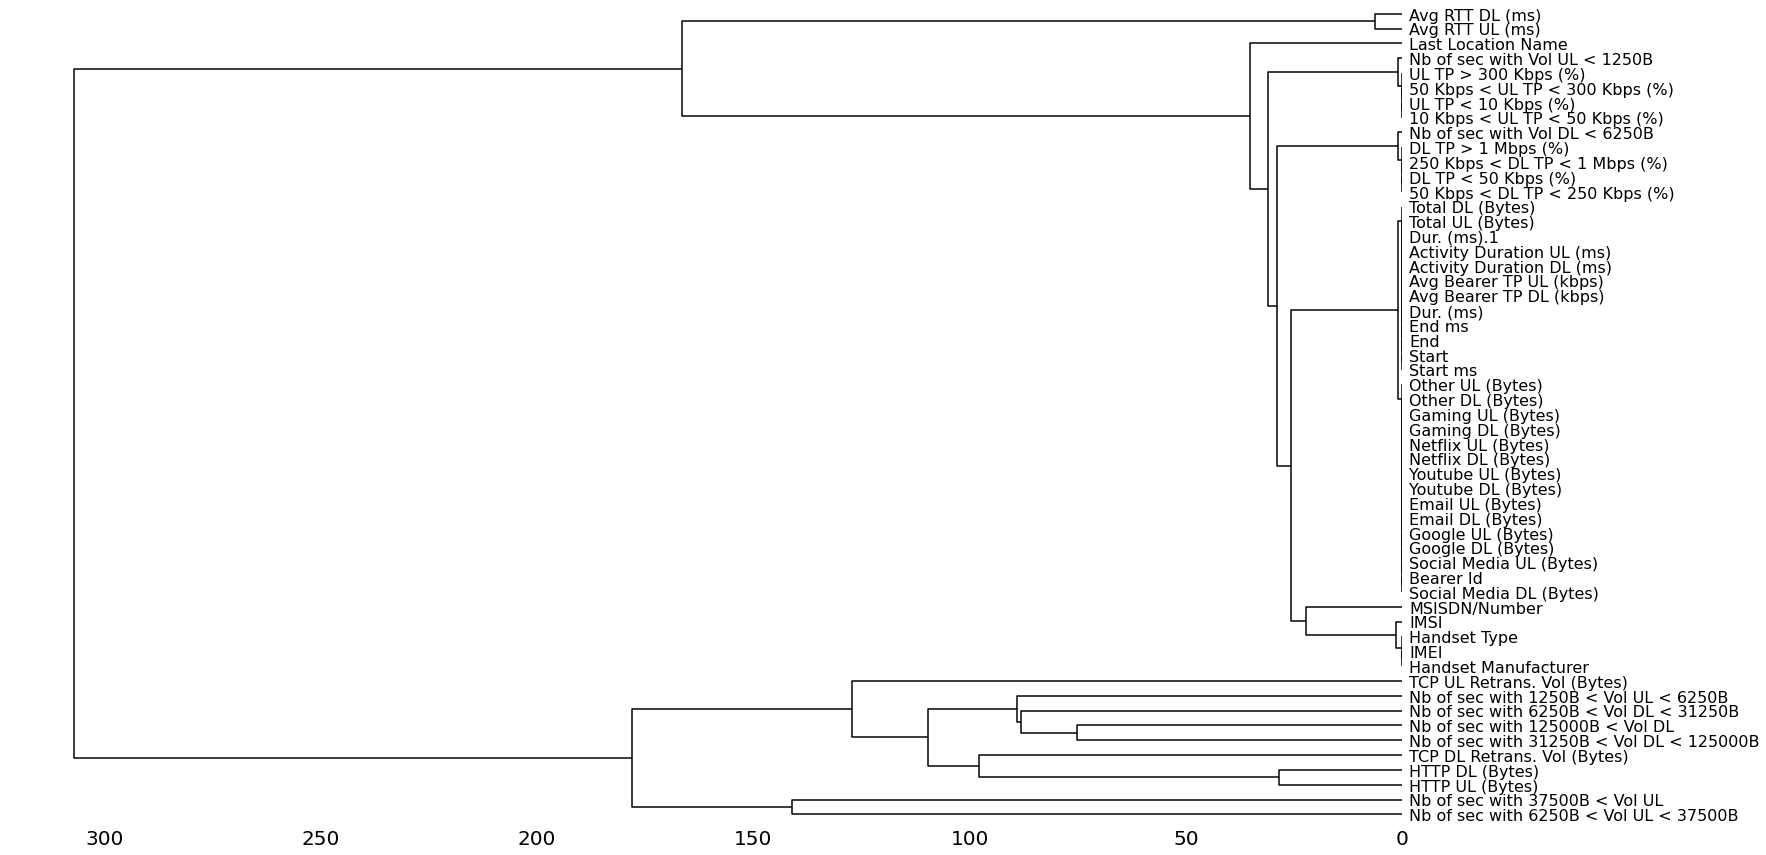

In [203]:
msno.dendrogram(df_from_excell)


In [20]:
totalCells, missingCount, totalMissing = percent_missing(df_from_excell)
print("The Diabetes dataset contains", round(
    ((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The Diabetes dataset contains 12.49 % missing values.


From the above graph we can observe that there are a lot of missing values. In total there are 12.49 % are missed.

In [21]:
mis_val_table_ren_columns = missing_values_table(df_from_excell)
mis_val_table_ren_columns


Your selected dataframe has 55 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


### skewness
- we cannot calculate skewness for six column as they are in string or datetim format

In [23]:
df_skewness = get_skewness(df_from_excell)
df_skewness


/Users/user/TENAC/week-1-4/Week-1/User-Analytics-Telecommunication-Industry/script/get_dataframe_information.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew(axis=0, skipna=True)


,skewness
Start ms,0.000968
End ms,-0.001163
Dur. (ms),3.952609
IMSI,41.045956
MSISDN/Number,332.155856
IMEI,1.071470
Avg RTT DL (ms),62.907828
Avg RTT UL (ms),28.457415
Avg Bearer TP DL (kbps),2.589437
Avg Bearer TP UL (kbps),4.503413


In [24]:
df = get_skewness_missing_count(df_skewness, mis_val_table_ren_columns)
df

,skewness,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,21.560028,130254.0,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,19.642752,111843.0,74.6,float64
Nb of sec with 125000B < Vol DL,6.592502,97538.0,65.0,float64
TCP UL Retrans. Vol (Bytes),84.113393,96649.0,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,6.610541,93586.0,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,22.035745,92894.0,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,6.896050,88317.0,58.9,float64
TCP DL Retrans. Vol (Bytes),15.951809,88146.0,58.8,float64
HTTP UL (Bytes),32.474970,81810.0,54.5,float64
HTTP DL (Bytes),38.944710,81474.0,54.3,float64


<AxesSubplot:ylabel='Density'>

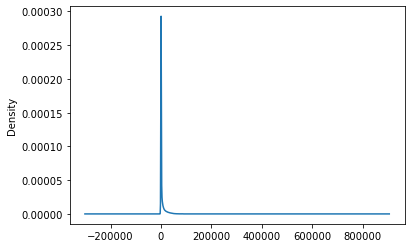

In [25]:
df_from_excell['Nb of sec with Vol UL < 1250B'].plot(kind='kde')
# MSISDN/Number


## Cleaning Data
- Drop column with missing value percentage > 30%
- Fill missing values with mean, median, mode, bfill, ffill, etc
- Mean and median is for numeric column only.
 
 Mean/Median/Mode Imputation for  less than 3% missing values. mode is good when the data distribution is skewed, and mean.media is good for data that are not skewed.
1. For the Timestamp columns (start,end).) I will use ffill as they are skewed have more on 1 missing value. Since the duration is provided they may not be important for the objective.
2. For the columns {Start, Start ms,End ms,Dur. (ms).1, Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps), Total DL (Bytes), Avg Bearer TP DL (kbps), ),Total UL (Bytes), Activity Duration DL (ms),Activity Duration UL (ms), End } are related to time/duration and have 1 missing values. droping the row with the missing values will not be a problem
3. For the numeric column ... I will use mean as they are not skewed have more than 15% but less than 30% missing values 
4. For the numeric column ... I will use mean as they are not skewed have more than 15% but less than 30% missing values
5. For the text column(Handset Manufacturer, Handset Type, and last location name, ) I will use mode are not numeric and we can found their mode easily, the % of missing value is more than 15% but less than 30% missing values  

In [219]:
df_clean = df_from_excell.copy()

In [220]:
# drop columns with missing values of > 20%
not_fill = df[df['% of Total Values'] > 20.0].index.tolist()
for col in not_fill:
    df_clean = df_clean.drop([col], axis=1)


all the column with missing values with precent of less than 20 and greater than 0.4 are replaced with mode as they are skewed. however for the  'MSISDN/Number','IMEI'	and 'MSI' we cannot do that because it should be unique, there should be no duplicate

In [221]:
#get the columns
fill_mode = df[(df['% of Total Values'] < 20.0) 
               & 
               (df['% of Total Values'] >=0.4)].index.tolist()
not_fill_mode = ['IMEI', 'IMSI', 'MSISDN/Number']
fill_mode = [x for x in fill_mode if x not in not_fill_mode]

fill_mode

['Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Last Location Name',
 'Nb of sec with Vol UL < 1250B',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Nb of sec with Vol DL < 6250B',
 'DL TP > 1 Mbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 'DL TP < 50 Kbps (%)',
 'Handset Type',
 'Handset Manufacturer']

In [222]:
for col in fill_mode:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [223]:
mis_val_table_after_clean = missing_values_table(df_clean)
mis_val_table_after_clean


Your selected dataframe has 45 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,float64
IMEI,572,0.4,float64
IMSI,570,0.4,float64
Start,1,0.0,datetime64[ns]
Start ms,1,0.0,float64
End,1,0.0,datetime64[ns]
End ms,1,0.0,float64
Dur. (ms),1,0.0,float64
Avg Bearer TP DL (kbps),1,0.0,float64
Avg Bearer TP UL (kbps),1,0.0,float64


In [224]:
df_clean = df_clean.drop(['MSISDN/Number', 'IMEI', 'IMSI'], axis=1)

mis_val_table_after_clean = missing_values_table(df_clean)
mis_val_table_after_clean


Your selected dataframe has 42 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Start,1,0.0,datetime64[ns]
Start ms,1,0.0,float64
End,1,0.0,datetime64[ns]
End ms,1,0.0,float64
Dur. (ms),1,0.0,float64
Avg Bearer TP DL (kbps),1,0.0,float64
Avg Bearer TP UL (kbps),1,0.0,float64
Activity Duration DL (ms),1,0.0,float64
Activity Duration UL (ms),1,0.0,float64
Dur. (ms).1,1,0.0,float64


In [225]:
df_clean.dropna(inplace=True)

mis_val_table_after_clean = missing_values_table(df_clean)
mis_val_table_after_clean

Your selected dataframe has 42 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [226]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150000 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   Last Location Name              150000 non-null  object        
 7   Avg RTT DL (ms)                 150000 non-null  float64       
 8   Avg RTT UL (ms)                 150000 non-null  float64       
 9   Avg Bearer TP DL (kbps)         150000 non-null  float64       
 10  Avg Bearer TP UL (kbps)         150000 non-null  float64

#### finally, save the clean dataframe to csv file

In [227]:
df_clean.to_csv('../data/clean_data.csv',index=False)


In [228]:
df_clean = pd.read_csv('../data/clean_data.csv')
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,9164566995485190,42.0,5.0,23.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,L77566A,65.0,5.0,16.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,D42335A,28.0,5.0,6.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,T21824A,28.0,5.0,44.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,D88865A,28.0,5.0,6.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [229]:
df_clean.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total